### Import Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


This data set is taken from https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data  the Source: UCI - Machine Learning Repository

### Read data

In [3]:
df = pd.read_csv('./input/data.csv')
df.shape

(569, 32)

In [4]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# We can drop the 'id' columns 
df.drop(columns = 'id', inplace = True)
df.head(4)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


### Count of target variable

B    357
M    212
Name: diagnosis, dtype: int64

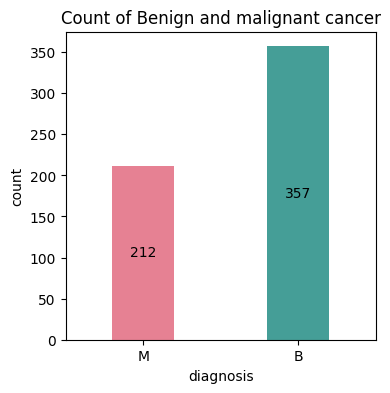

In [8]:
# Diagnosis (M = malignant, B = benign)
plt.figure(figsize=(4,4))
ax = sns.countplot(data = df, x = 'diagnosis',label="Count", width = 0.4, palette='husl')     
plt.title('Count of Benign and malignant cancer')
ax.bar_label(ax.containers[0], label_type='center')
display(df['diagnosis'].value_counts())

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Correlation between features

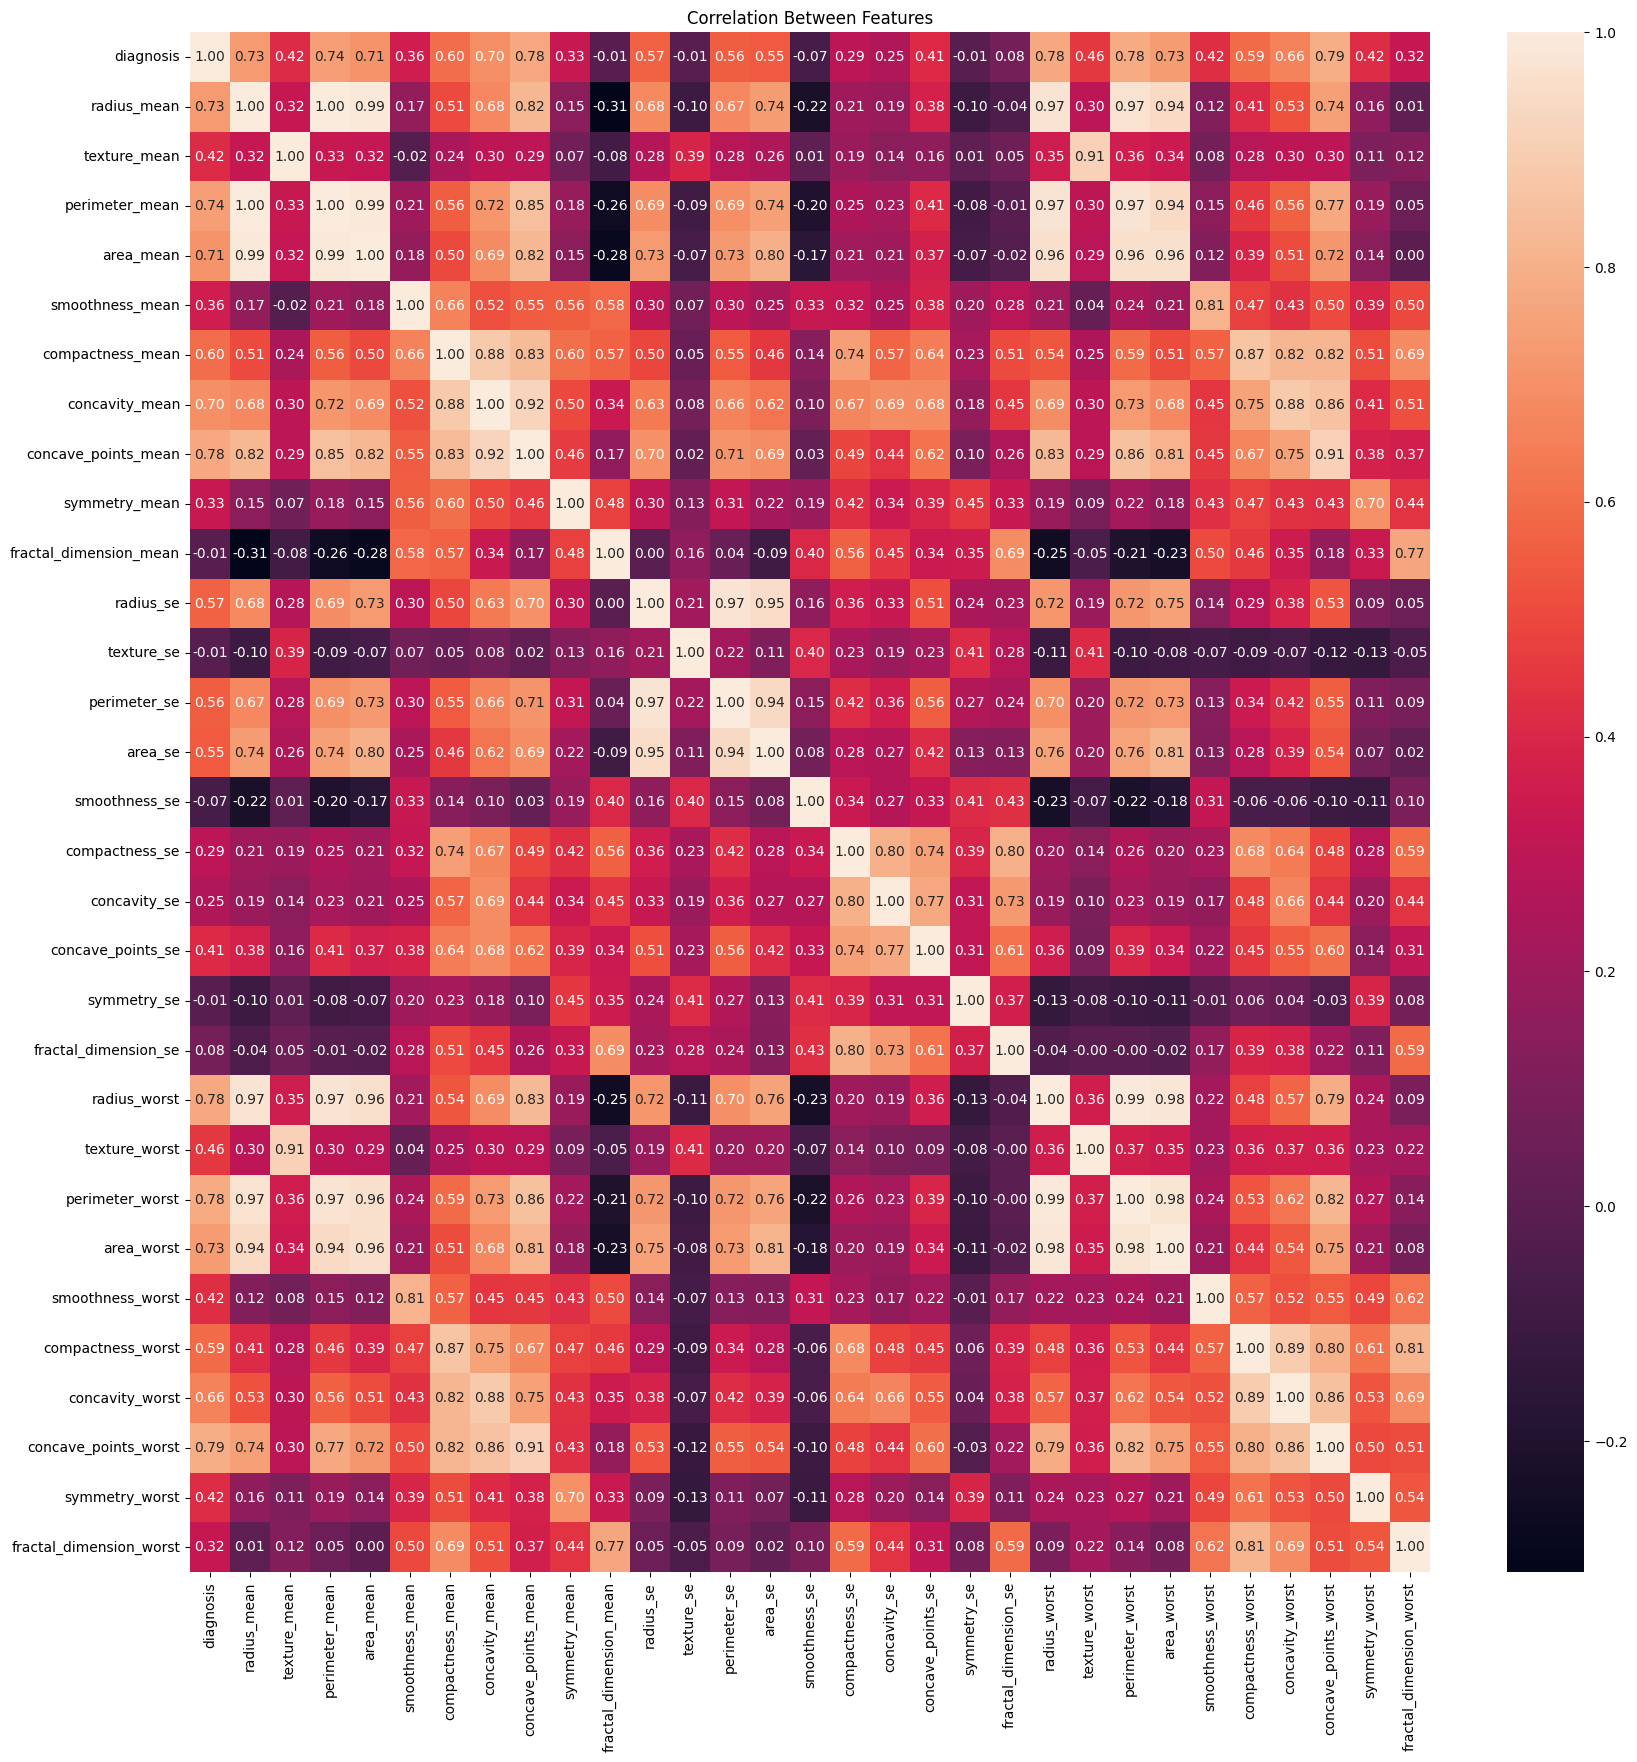

In [10]:
plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')
plt.title("Correlation Between Features")
plt.show()

### Find the features that is highly correlated with our target and I set the threshold 0.5

In [11]:
corr_matrix = df.corr()
threshold = 0.5
corr_filter = np.abs(corr_matrix["diagnosis"] > threshold)
corr_features = corr_matrix.columns[corr_filter].tolist()
print(corr_features)

['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst']


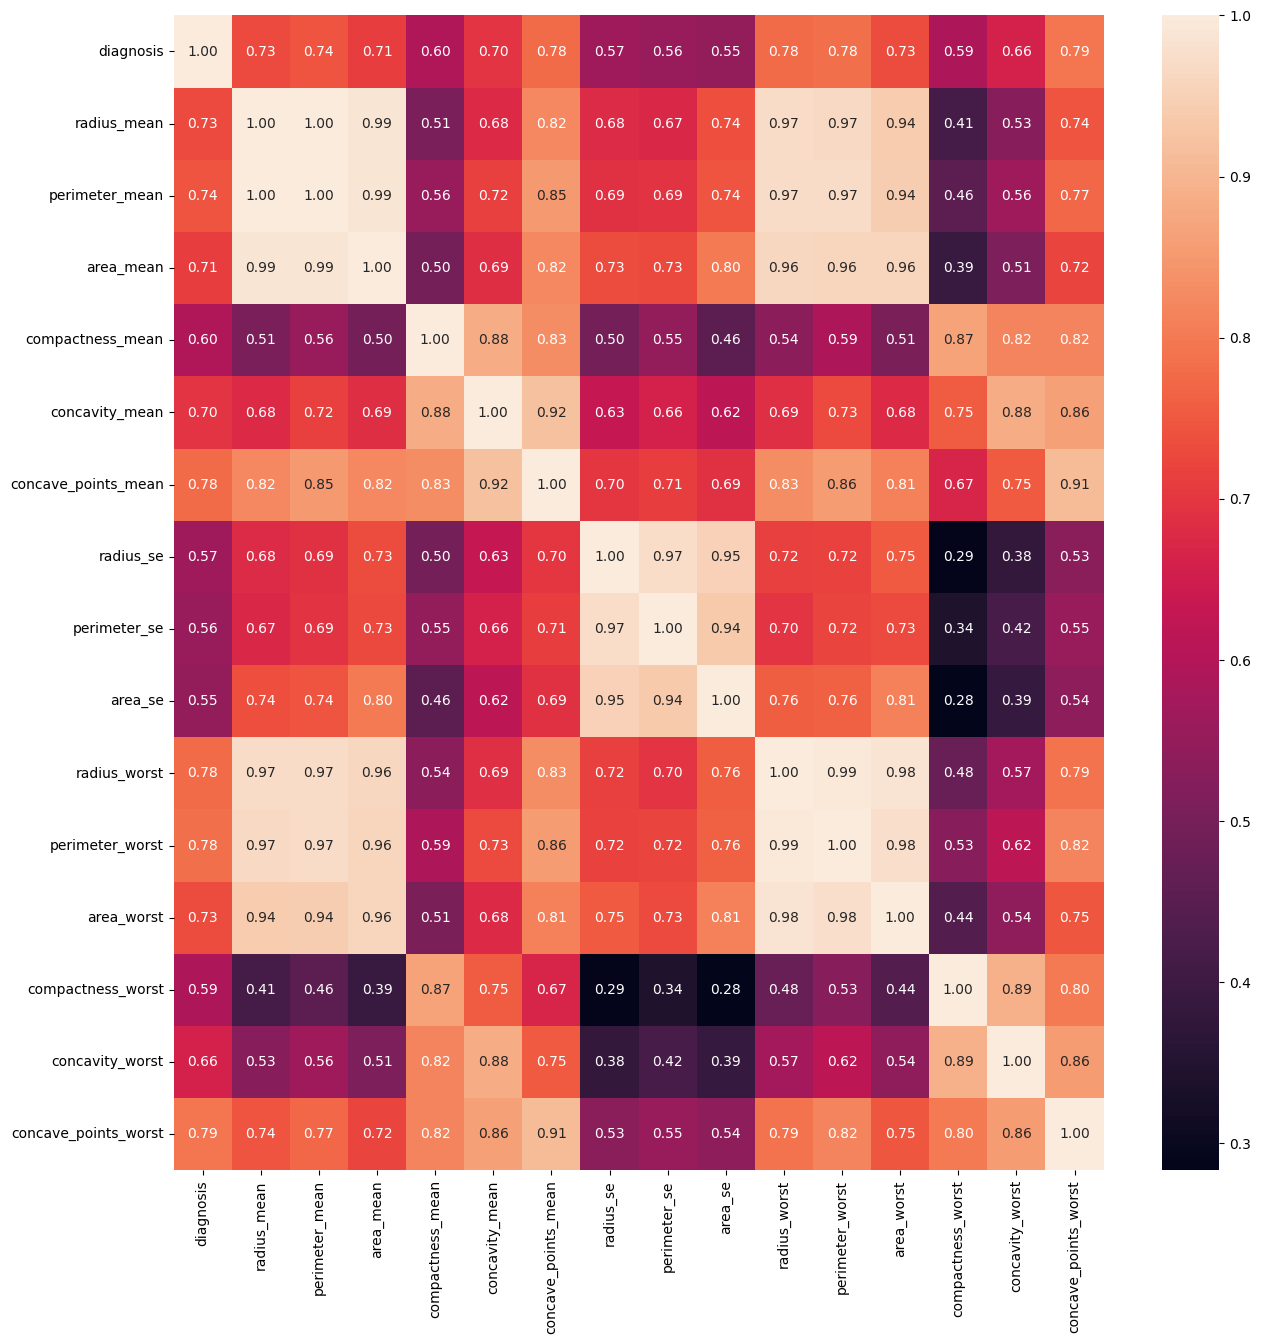

In [12]:
plt.subplots(figsize = (15,15))
sns.heatmap(df[corr_features].corr(), annot=True, fmt='0.2f')
plt.show()

### Normalization

In [13]:
X = df.drop(columns='diagnosis', axis = 1)
y = df['diagnosis']
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [14]:
X.describe().round(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,...,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,-1.820,...,-1.727,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602
25%,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,-0.723,...,-0.675,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692
50%,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,-0.178,...,-0.269,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216
75%,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,0.471,...,0.522,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451
max,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,4.911,...,4.094,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847


### Visualization

#### Boxplot of the first 10 features

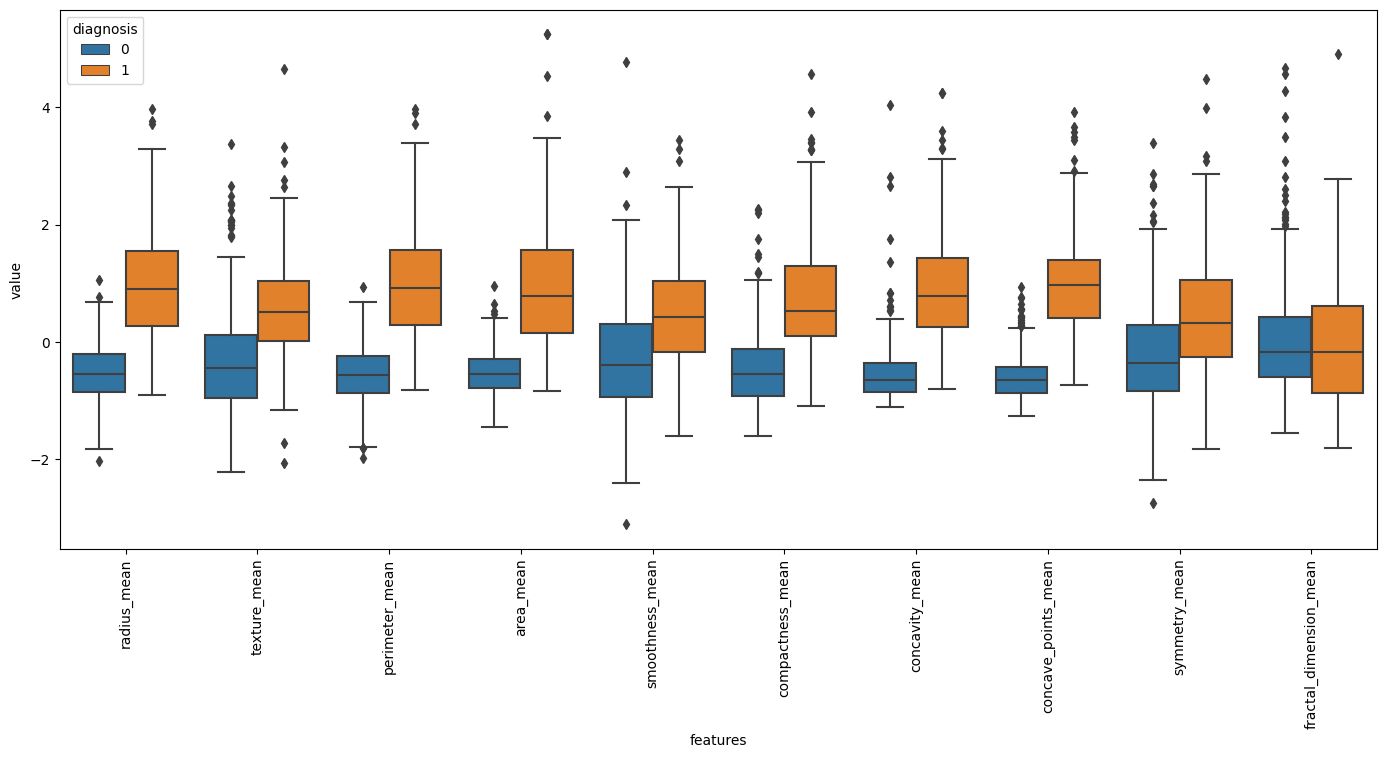

In [15]:

data = pd.concat([y,X.iloc[:,0:10]],axis=1)

data_melt = pd.melt(data, id_vars = "diagnosis",
                   var_name = "features",
                   value_name = "value")

plt.figure(figsize = (17,7))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melt)
plt.xticks(rotation = 90)
plt.show()


 - In texture_mean,radius_mean, 'area_mean', other  features,the  median of the Malignant and Benign are clearly separated from each other and  they can be good features for classification. On the other hand, in 'symmetry_mean',  and 'fractal_dimension_mean' features, median of the Malignant and Benign are almost same so it does not gives much information for classification. We can drop those features which does not have separated median.
 
 - For radius_mean, perimeter_mean, and area_mean boxplot, they look similar. i.e. maybe they are highly correlated. In that case, we do not need all 3 features. 

#### Boxplot of the second 10 features

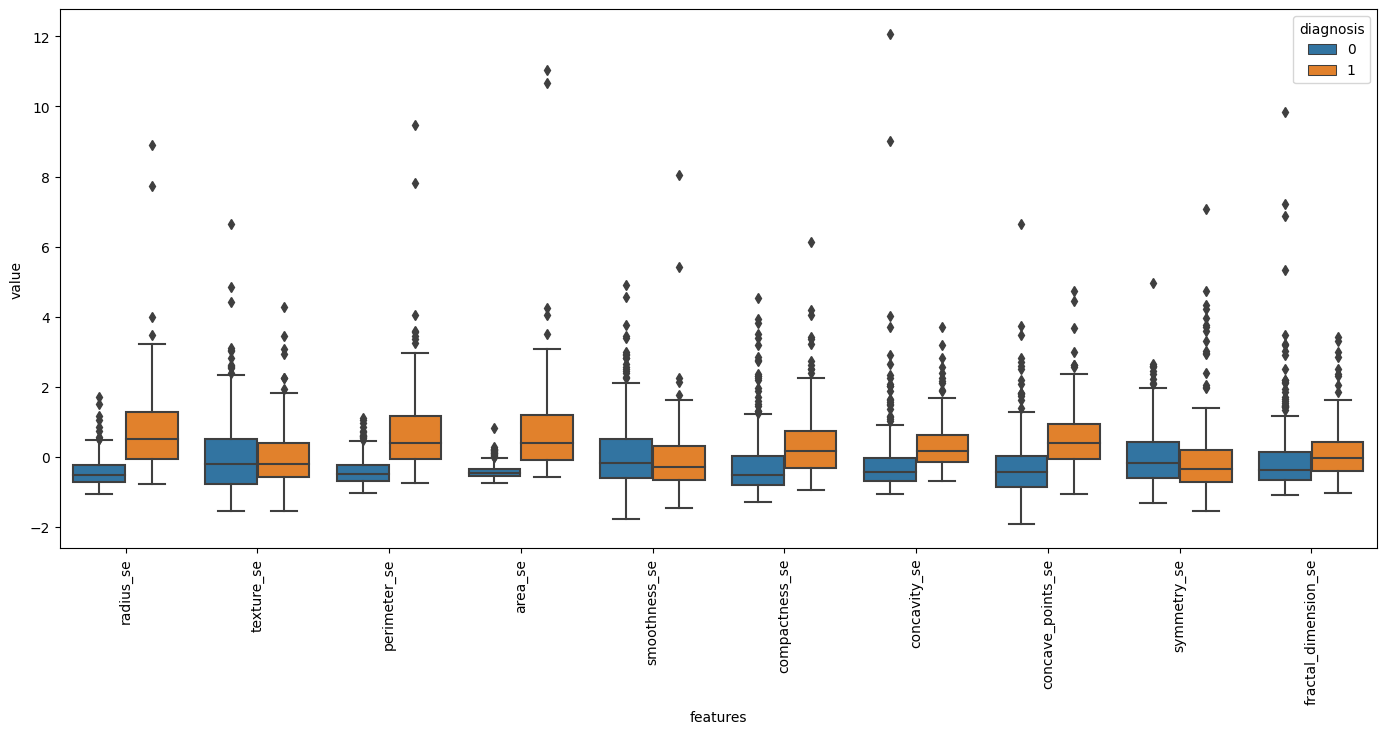

In [16]:

data = pd.concat([y,X.iloc[:,10:20]],axis=1)

data_melt = pd.melt(data, id_vars = "diagnosis",
                   var_name = "features",
                   value_name = "value")

plt.figure(figsize = (17,7))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melt)
plt.xticks(rotation = 90)
plt.show()


#### Boxplot of the last 10 features

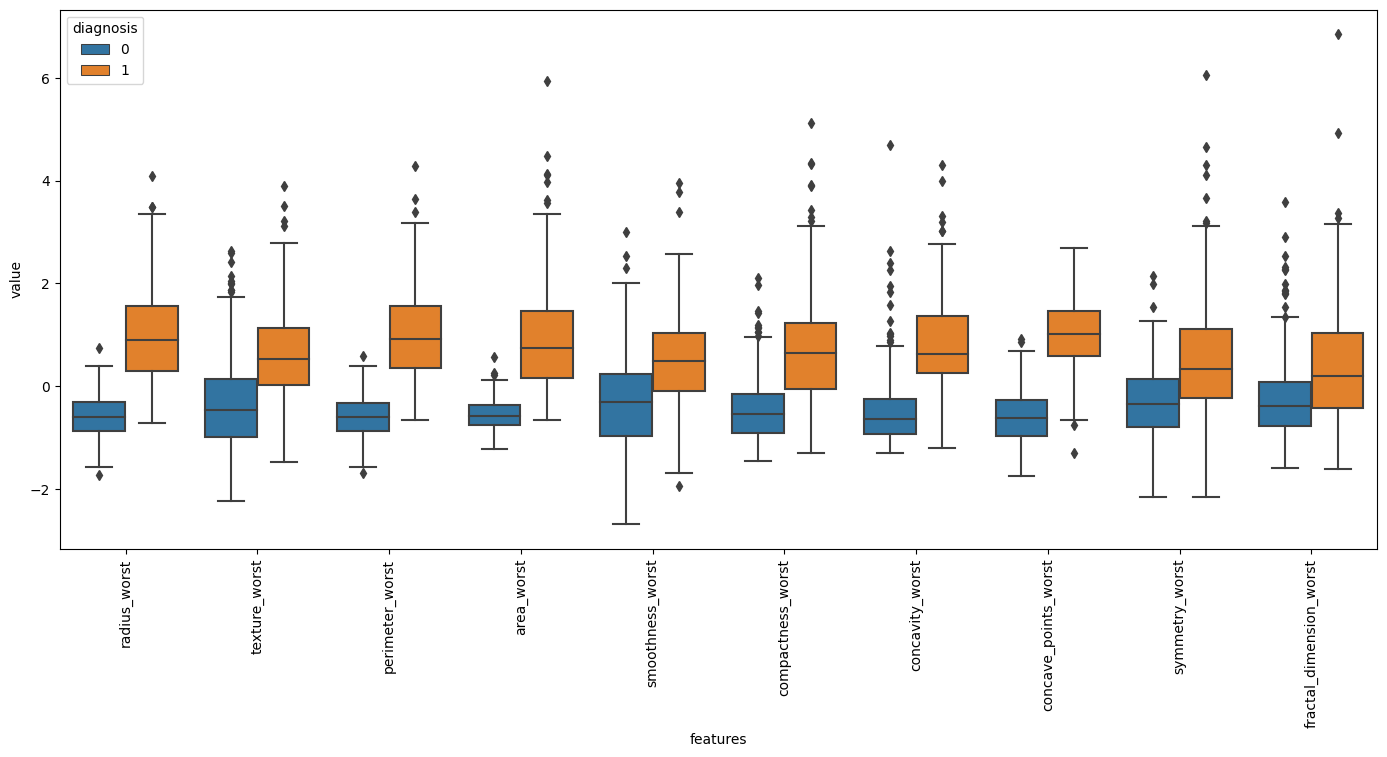

In [17]:

data = pd.concat([y,X.iloc[:,20:31]],axis=1)

data_melt = pd.melt(data, id_vars = "diagnosis",
                   var_name = "features",
                   value_name = "value")

plt.figure(figsize = (17,7))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melt)
plt.xticks(rotation = 90)
plt.show()


 drop_columns = ['symmetry_mean', 'fractal_dimension_mean','texture_se','smoothness_se','symmetry_se',
       'fractal_dimension_se',]

- We can drop 'symmetry_mean', 'fractal_dimension_mean','texture_se','smoothness_se','symmetry_se',
       'fractal_dimension_se' features as we cannot separate the medians of the target

### Let's look for features that are correlated with each other

In [18]:
corr_matrix = X.corr()
threshold = 0.95
corr_features_all = []

for col in X.columns:
    if col in corr_features_all:
        continue
    corr_filter = np.abs(corr_matrix[col] > threshold)
    corr_features = corr_matrix.columns[corr_filter].tolist()
    corr_features_all.append(corr_features)
print(corr_features_all)    

[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst'], ['texture_mean'], ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst'], ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], ['smoothness_mean'], ['compactness_mean'], ['concavity_mean'], ['concave_points_mean'], ['symmetry_mean'], ['fractal_dimension_mean'], ['radius_se', 'perimeter_se', 'area_se'], ['texture_se'], ['radius_se', 'perimeter_se'], ['radius_se', 'area_se'], ['smoothness_se'], ['compactness_se'], ['concavity_se'], ['concave_points_se'], ['symmetry_se'], ['fractal_dimension_se'], ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], ['texture_worst'], ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], ['area_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], ['smoothness_worst'], ['compactness_worst'], ['concavity_worst'], ['

<Figure size 600x600 with 0 Axes>

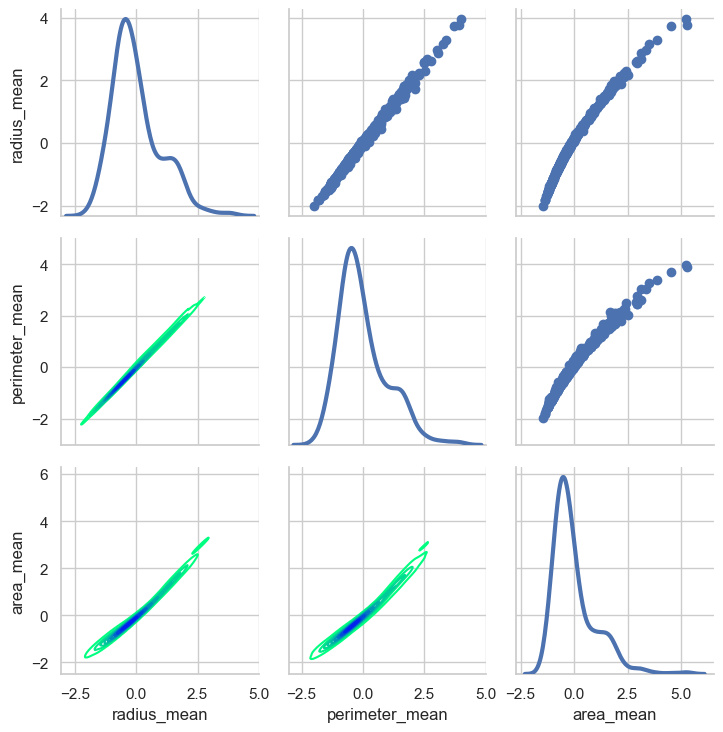

In [19]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
df = X.loc[:,['radius_mean','perimeter_mean','area_mean']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="winter_r")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

-  'radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst' ,and  'area_worst' are correlated with each other so we will use only area_mean.
-  'radius_se', 'perimeter_se', 'area_se'  are correlated with each other so we will use only area_se


In [20]:
columns_to_drop = ['symmetry_mean', 'fractal_dimension_mean','texture_se','smoothness_se','symmetry_se', 
                   'fractal_dimension_se','radius_mean', 'perimeter_mean', 'radius_worst',
                   'perimeter_worst','area_worst','radius_se', 'perimeter_se']
X.drop(columns=columns_to_drop, axis = 1, inplace = True)
print(X.shape)
X.head()

(569, 17)


,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,area_se,compactness_se,concavity_se,concave_points_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.487578,1.316862,0.724026,0.660820,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.742402,-0.692926,-0.440780,0.260162,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,1.181336,0.814974,0.213076,1.424827,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,-0.288378,2.744280,0.819518,1.115007,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,1.190357,-0.048520,0.828471,1.144205,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Training and test data

In [21]:
    # Train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

### Logistic regression

In [22]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)
print("    Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

confusion_matrix(y_test, y_pred)

    Accuracy: 96.49 %


array([[66,  1],
       [ 3, 44]], dtype=int64)

### K- nearest neighbors

In [23]:
print('KNN model')
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
print("    Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

confusion_matrix(y_test, y_pred)

KNN model
    Accuracy: 94.74 %


array([[66,  1],
       [ 5, 42]], dtype=int64)

### Support Vector

In [24]:
print('SVC model')
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)


y_pred = svc_model.predict(X_test)
print("    Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

confusion_matrix(y_test, y_pred)

SVC model
    Accuracy: 96.49 %


array([[67,  0],
       [ 4, 43]], dtype=int64)